In [1]:
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

from utils.conn_data import load_pickle

plt.style.use('ggplot')

In [71]:
def tensor_to_dataframe(tensor):
    loss_list = []
    for i in range(tensor.shape[0]):
        loss_list.append(pd.DataFrame(tensor[i, :, :].numpy()))
    loss_df = pd.concat(loss_list, axis=0)
    return loss_df

In [2]:
outputs_path = os.path.join(os.getcwd(), 'data', 'outputs')

In [95]:
dataset = "simulation1a"
models = os.listdir(os.path.join(outputs_path, dataset))
all_test_data = []
agg_metrics = []
all_metrics_by_true_cov = []
all_diff_by_true_cov = []
# for model in models:
model = "sdne5_50_1_1_100"

# load data
training_info = load_pickle(os.path.join(outputs_path, dataset, model, 'training_info.pkl'))
predictions = load_pickle(os.path.join(outputs_path, dataset, model, 'predictions.pkl'))

# parse data
train_loss = tensor_to_dataframe(tensor=training_info["train_loss"]).reset_index(drop=True)
train_predictions = tensor_to_dataframe(tensor=predictions["train_predictions"]).reset_index(drop=True)
train_predictions["error"] = train_predictions[0] - train_predictions[1]

In [75]:
training_info.keys()

dict_keys(['train_loss', 'epochs_global_loss', 'epochs_local_loss', 'epochs_reg_loss'])

In [76]:
predictions.keys()

dict_keys(['train_predictions', 'test_predictions'])

In [77]:
training_info["train_loss"].shape

torch.Size([100, 30000, 2])

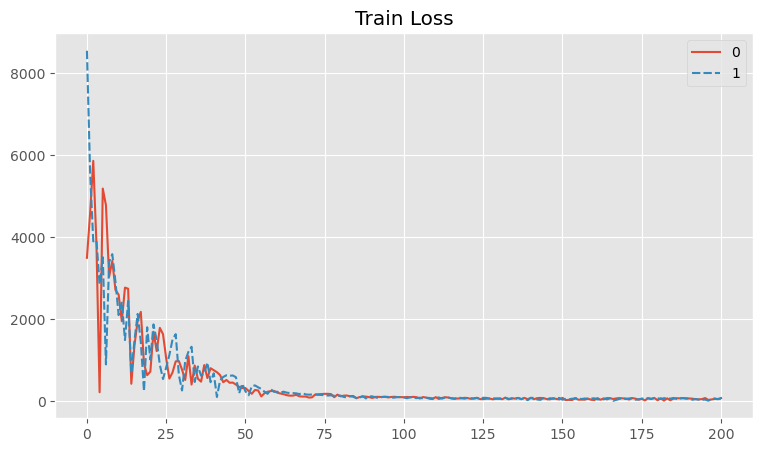

In [89]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=train_loss.loc[0:200, :])
plt.title("Train Loss")
plt.show()

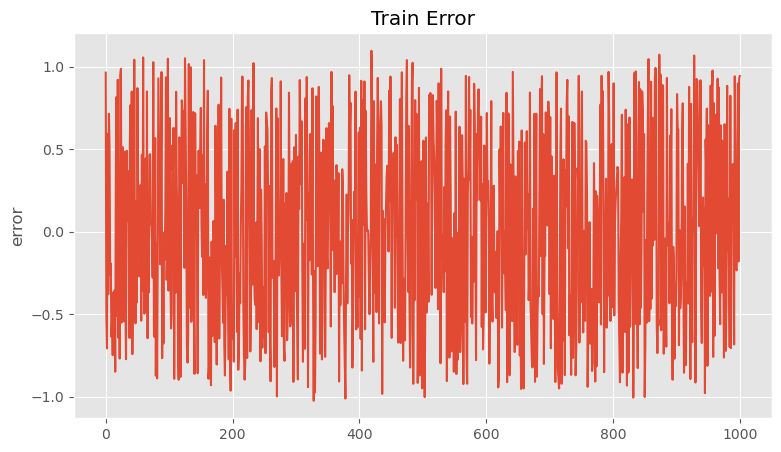

In [102]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=train_predictions.loc[0:1000, "error"])
plt.title("Train Error")
plt.show()